In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [67]:
data=pd.read_csv("EastWestAirlines.csv", encoding='latin-1' )

In [68]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [69]:
data.shape

(3999, 12)

In [70]:
data.rename(columns={'ID#':'Unique_Id','Award?':'Award'}, inplace=True)

In [71]:
data.head()

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unique_Id          3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [73]:
data.isnull().sum()

Unique_Id            0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [74]:
data.duplicated().sum()

0

In [75]:
data.head(1)

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0


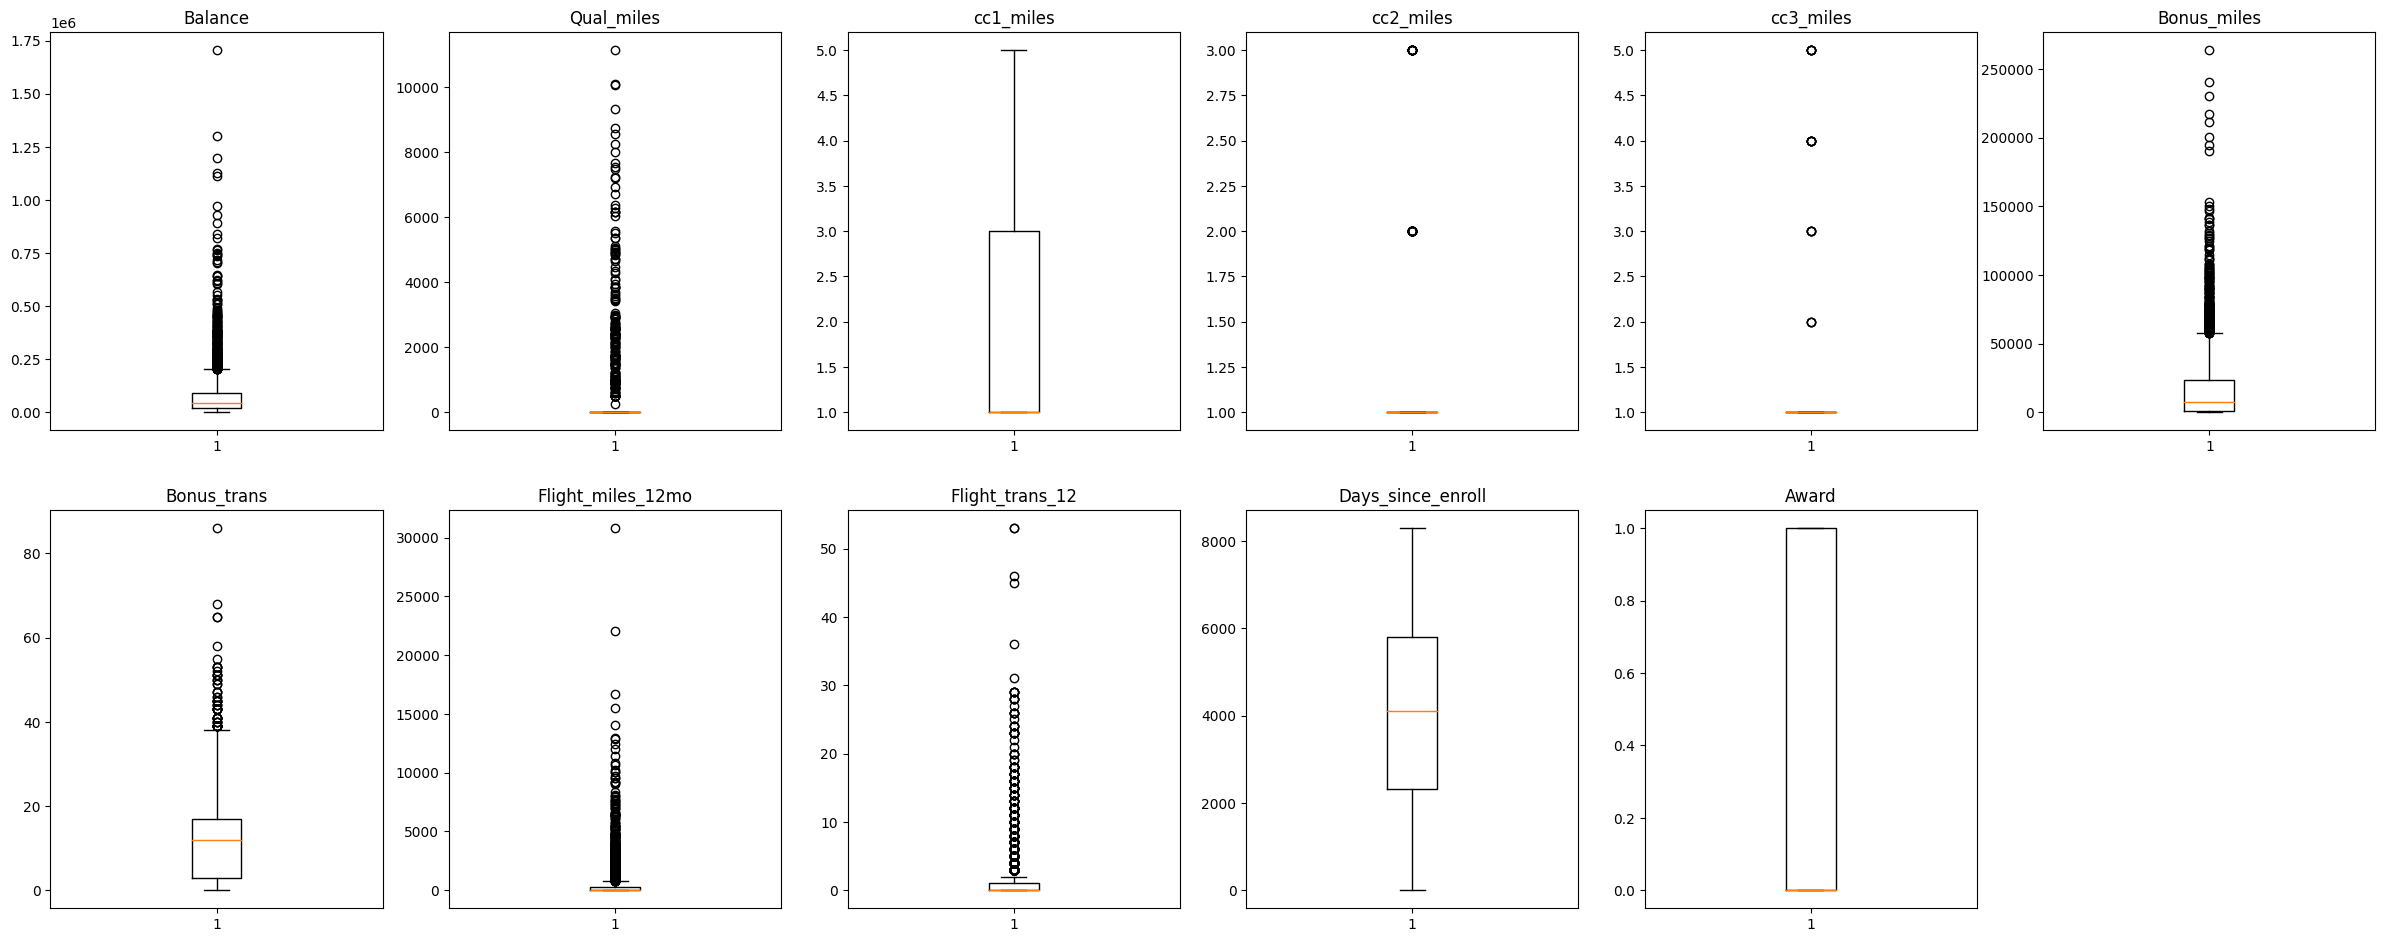

In [76]:
plt.figure(figsize=(30,30))
plt.subplot(5,6,1)
plt.title("Balance")
plt.boxplot(data.Balance)

plt.subplot(5,6,2)
plt.title("Qual_miles")
plt.boxplot(data.Qual_miles)

plt.subplot(5,6,3)
plt.title("cc1_miles")
plt.boxplot(data.cc1_miles)

plt.subplot(5,6,4)
plt.title("cc2_miles")
plt.boxplot(data.cc2_miles)

plt.subplot(5,6,5)
plt.title("cc3_miles")
plt.boxplot(data.cc3_miles)

plt.subplot(5,6,6)
plt.title("Bonus_miles")
plt.boxplot(data.Bonus_miles)

plt.subplot(5,6,7)
plt.title("Bonus_trans")
plt.boxplot(data.Bonus_trans)

plt.subplot(5,6,8)
plt.title("Flight_miles_12mo")
plt.boxplot(data.Flight_miles_12mo)

plt.subplot(5,6,9)
plt.title("Flight_trans_12")
plt.boxplot(data.Flight_trans_12)

plt.subplot(5,6,10)
plt.title("Days_since_enroll")
plt.boxplot(data.Days_since_enroll)

plt.subplot(5,6,11)
plt.title("Award")
plt.boxplot(data.Award)

plt.show()

#Outlier detection

In [77]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

KMEANS

In [78]:
from sklearn.cluster import KMeans

In [79]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(scaled_data)
  WCSS.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [80]:
len(WCSS)

10

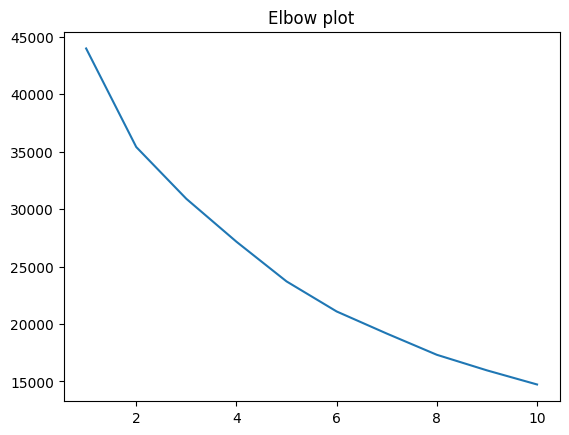

In [81]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

#from the below plot we can consider k value as 6

In [82]:
#Build Model
final_model=KMeans(n_clusters=6, random_state=42)
final_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [83]:
data['ClusterId']=final_model.predict(scaled_data)

In [84]:
data.head()

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [85]:
#we will group our data based on clusters
grp=data.groupby(data['ClusterId'])

In [86]:
for x,y in grp:
  print(y)
  print('--------------------------------------------------------------------------------')

      Unique_Id  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
4             5    97752           0          4          1          1   
6             7    84914           0          3          1          1   
9            10   104860           0          3          1          1   
11           12    96522           0          5          1          1   
15           16    28495           0          4          1          1   
...         ...      ...         ...        ...        ...        ...   
3979       4002    57793           0          3          1          1   
3980       4003    28867           0          3          1          1   
3985       4008    59017           0          4          1          1   
3991       4014    39142           0          3          1          1   
3996       4019    73597           0          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
4           43300           26               2077    

In [87]:
grp.agg(['mean'])

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId,,,,,,,,,,,,
0,1594.881180,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,2239.169553,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [88]:
#Total 6 clusters are formed with similar passangers in each cluster
#In cluster 4 Qual_mile--Number of miles counted as qualifying for Topflight status are more and cluster 5 has the least.
#Balance is high for cluster 2
#cc2_miles more in cluster 5
#In cluster 1 many people are eligible for award flight (free flight)


DBSCAN CLUSTERING

In [89]:
from sklearn.cluster import DBSCAN

In [90]:
#build the model
model1=DBSCAN(eps=0.5, min_samples=24, metric='euclidean')
model1.fit(scaled_data)
a=model1.fit_predict(scaled_data)

In [91]:
a

array([ 0,  0,  0, ..., -1,  0,  0])

In [92]:
#attaching o/p to the original data
data['DBSCAn_ClusterId']=model1.fit_predict(scaled_data)

In [93]:
data.head()

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId,DBSCAn_ClusterId
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1


In [94]:
#we will group our data based on clusters
grp1=data.groupby(data['DBSCAn_ClusterId'])

In [95]:
for x,y in grp:
  print(y)
  print('--------------------------------------------------------------------------------')

      Unique_Id  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
4             5    97752           0          4          1          1   
6             7    84914           0          3          1          1   
9            10   104860           0          3          1          1   
11           12    96522           0          5          1          1   
15           16    28495           0          4          1          1   
...         ...      ...         ...        ...        ...        ...   
3979       4002    57793           0          3          1          1   
3980       4003    28867           0          3          1          1   
3985       4008    59017           0          4          1          1   
3991       4014    39142           0          3          1          1   
3996       4019    73597           0          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
4           43300           26               2077    

In [96]:
grp1.agg(['mean'])

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAn_ClusterId,,,,,,,,,,,,,
-1,1746.649545,108782.370000,261.960909,2.636818,1.026364,1.022273,27442.460000,16.125909,806.849545,2.383182,4632.061364,0.562273,1.065909
0,2371.424084,24983.774121,0.000000,1.000000,1.000000,1.000000,1698.840688,4.296933,35.869110,0.135378,3440.127150,0.000000,2.000000
1,2090.989474,70677.442105,0.000000,3.000000,1.000000,1.000000,17422.705263,14.347368,22.594737,0.094737,3861.357895,0.000000,1.452632
2,1980.368421,30722.122807,0.000000,3.000000,1.000000,1.000000,17820.315789,14.850877,38.596491,0.157895,4190.403509,1.000000,0.017544
3,2570.115385,26359.046154,0.000000,1.000000,1.000000,1.000000,2742.553846,2.884615,61.876923,0.253846,3124.061538,1.000000,2.000000
4,3102.678571,44624.178571,0.000000,2.000000,1.000000,1.000000,7825.571429,13.571429,0.000000,0.000000,2237.214286,0.000000,2.000000


In [97]:
#-1 is the noise
#5 clusters have been created based on the dense
#cluster 1 has more number of balance eligible for award flight and has more Number of days since enrolled in flier program
#cluster 2 has earned more Number of miles earned from non-flight bonus transactions in the past 12 months
#in cluster 2 and 3 people are eligible for free flight.
#cluster 0 has the least Balance
#there are many noise points
#cluster 3 has covered more Number of flight miles in the past 12 months and cluster 4 covered 0  miles



Hierarchical Clustering

In [98]:
from sklearn.cluster import AgglomerativeClustering

In [99]:
model2=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 6
model2.fit(scaled_data)
model2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [100]:
data['Hier_ClusterId']=model2.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [101]:
data.head()

,Unique_Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId,DBSCAn_ClusterId,Hier_ClusterId
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1,0


In [102]:
#we will group our data based on clusters
grp2=data.groupby(data['Hier_ClusterId'])

In [103]:
for x,y in grp1:
  print(y)
  print("-------------------------------------------------------------------------------------------------")

      Unique_Id  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
4             5    97752           0          4          1          1   
6             7    84914           0          3          1          1   
7             8    20856           0          1          1          1   
8             9   443003           0          3          2          1   
9            10   104860           0          3          1          1   
...         ...      ...         ...        ...        ...        ...   
3980       4003    28867           0          3          1          1   
3985       4008    59017           0          4          1          1   
3986       4009    34235           0          1          1          1   
3991       4014    39142           0          3          1          1   
3996       4019    73597           0          3          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
4           43300           26               2077    

In [104]:
grp2[['Balance',	'Qual_miles',	'cc1_miles'	,'cc2_miles'	,'cc3_miles'	,'Bonus_miles',	'Bonus_trans',	'Flight_miles_12mo'	,'Flight_trans_12',	'Days_since_enroll',	'Award']].agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hier_ClusterId,,,,,,,,,,,
0,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
1,133459.291339,334.472441,2.629921,1.000000,1.000000,45139.023622,29.842520,5246.244094,15.157480,4949.787402,0.811024
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [105]:
#cluster 4 has more balance and they have more Number of days since enrolled in flier program
#cluster 3 took  more Number of flight miles in the past 12 months and all of them have award flight
#cluster 2 has earned more Number of miles earned from non-flight bonus transactions in the past 12 months and moreNumber of miles earned from non-flight bonus transactions in the past 12 months


In [106]:
#dendrogram

from scipy.cluster import hierarchy

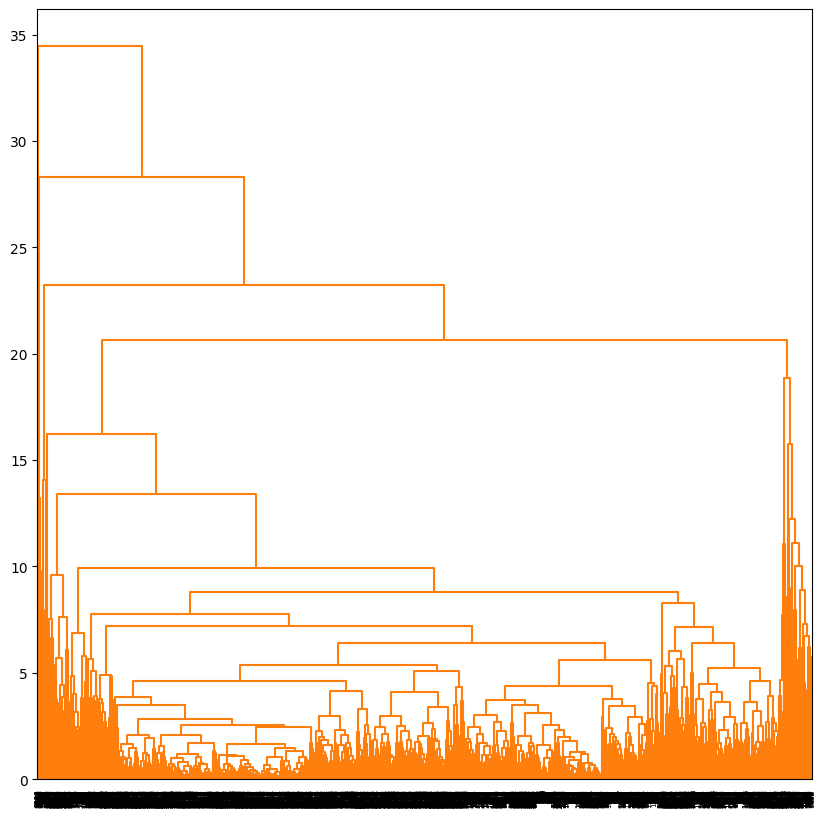

In [107]:
plt.figure(figsize=(10,10))
hr=hierarchy.linkage(scaled_data, method='complete')
dn=hierarchy.dendrogram(hr, color_threshold=6000)
plt.show()

In [108]:
#by giving the color_threshold, you can cut there and get the number of clusters

silhouette_score

In [109]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['Hier_ClusterId'] )

0.5404241979396106

In [110]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['ClusterId'] )

0.3333400448791009

In [111]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['DBSCAn_ClusterId'] )

-0.13301907426116333

In [ ]:
#Sillhoutte score looks at the intra and inter cluster distance only
#We can see from the above Hierrcial clustering has goog silhoutte score of 0.54
#DBScan is not a not model as the silhouette score is in negative.